# Introduction & Algebra 101 
Before delving into the realm of neural networks, it is wise to familiarize ourselves with the tools we are going to be using. True hackers know the tools of their craft as the palm of their hands. 

We are first going to look at the mathematical operations that we will need to build neural networks. No degree of mathematical literacy is expected. However, fluency helps. To get you going as much as possible, we will be looking at graphical interpretations of almost anything we do. I find that playing with plots brings a childlike learning state that makes hard concepts much easier to grasp.

Some level fluency with Python is assumed, though good programmers should be able to easily pick it up. Python's syntax is easy to read and comes bundled with thousands of libraries to make our life easier. In any case, we will start slow and start packing further. 

Without further ado, we begin preparing our necessary libraries:

In [1]:
%matplotlib inline
import math 
import numpy as np 
from ipywidgets import *
import matplotlib.pyplot as plt

NumPy is a library for efficient array processing, linear algebra and number crunching. It is the most common Python interface for working with vectors, matrices and tensors. Matplotlib is the go-to plotting library for Python. With these two libraries, we will show the basic ideas one by one. We also import iPython widgets so we interactively explore concepts later in this class. Let's see what all these words mean, a couple at a time. 

In [2]:
vector = np.random.random(2).astype(np.float32)
matrix = np.random.random((3, 2))
tensor = np.random.random((2, 3, 2))

print('Printing vector:')
print(vector)
print('Printing matrix:')
print(matrix)
print('Printing tensor:')
print(tensor)

Printing vector:
[0.890551   0.21804538]
Printing matrix:
[[0.8018962  0.2501971 ]
 [0.80991353 0.88695562]
 [0.70353367 0.52237371]]
Printing tensor:
[[[0.62640199 0.61765259]
  [0.85061198 0.03424182]
  [0.78703794 0.90728034]]

 [[0.28702604 0.59814506]
  [0.74150477 0.31447623]
  [0.09071354 0.90482426]]]


We have defined three variables: 

 * a **vector**, which is nothing more than an array of a given type with a fixed number of elements, usually called components, 
 * a **matrix**, which can be understood as a list of vectors stacked together, and
 * a **tensor**, which generalizes vectors and matrices into typed structures with some number of dimensions and a fixed number of components in each dimension.

In particular, we have a float32 vector with 2 components, a float64 matrix with $3 \times 2$ components and a float64 tensor with $2 \times 3 \times 2$ components. Generally, we call `shape` the tuple representing the number of components per dimension. Tensors are typed: the matrix and the tensor are float64 because it is the default type that NumPy assumes. All the values are random and between 0 and 1, though at this we don't worry about the specific values. We are using relatively small tensors so that we can print them, but their number of components, their shapes, can be arbitrarily large. More on that in a moment.

Let's look at some operations with tensors:

In [3]:
vector_x_number = vector * 2
print(vector)
print(vector_x_number)

[0.890551   0.21804538]
[1.781102   0.43609077]


In the simplest case we are multiplying by a number. Doing this will simply multiply each of the components by the number. Another way to see this is as 'scaling' the number. Addition, subtraction, division and power also work:

In [4]:
print(vector + 1)
print(vector - 1)
print(vector / 2)
print(vector ** 2)

[1.890551  1.2180454]
[-0.10944903 -0.78195465]
[0.4452755  0.10902269]
[0.79308105 0.04754379]


This operation can actually be applied between tensors that are compatible. For instance, we can add the components of two vectors together, one by one. All basic operations are supported:

In [5]:
print(vector + vector) # should be the same as vector_x_number
print(vector * vector)
print(vector / vector) # should be (1, 1)
print(vector ** vector)

[1.781102   0.43609077]
[0.79308105 0.04754379]
[1. 1.]
[0.90192115 0.71741956]


Shape compatibility roughly means that we can align the tensors so that we can operate component by component. This is called a **pointwise** operation. Let's add our vector to our whole matrix as an example:

In [6]:
print(matrix + vector)

[[1.69244717 0.46824248]
 [1.7004645  1.10500101]
 [1.59408464 0.7404191 ]]


A more interesting operation is the dot product. We will get an intuition of what it does later, but for now we can just understand it as an operation that takes two vectors of the same length and gives us a number. 

In [7]:
vector_x_vector = vector.dot(vector)
print(vector_x_vector)

0.8406248


For two vectors, the dot product is computed as the sum of products of each component. In standard, unoptimized python, this will be:

In [8]:
def dot_example(a, b):
    '''Computes the dot product between two vectors a and b'''
    if a.size != b.size:
        raise RuntimeError('Vector sizes must match!')
    accum = 0.0
    for i in range(a.size):
        accum += a[i] * b[i]
    return accum

print(dot_example(vector, vector))

0.8406248353421688


Beyond some rounding error, we get the same result. NumPy is optimized under the hood so it is better for performance to stick to its functions if possible. Besides, our implementation is brittle and not very general! You can also compute the dot product between a vector and a matrix, or between matrices. When we do that, we have to make sure that the sizes of the matrices or vectors that we are working with match. What does this mean?

When working with a vector, the sizes must match. In the case of a vector multiplying a matrix (or the other way around), the vector's size must match the size of the first component of the matrix. In general, for two matrices $A$ and $B$, we need to make sure that $A$ has shape $(N, M)$ and $B$ has shape $(M, L)$. Vectors are $(1, N)$ or $(N, 1)$ matrices when looking at it like this.

If you are confused, just take a look at some code:

In [9]:
print('Shape of the vector: {}'.format(vector.shape))
print('Shape of the matrix: {}'.format(matrix.shape))

matrix_x_vector = matrix.dot(vector) # (3, 2) and (2, 1)
vector_x_matrix = vector.dot(matrix) # comment this line out -- shapes don't match!

print('Shape of the dot product: {}'.format(matrix_x_vector.shape))

Shape of the vector: (2,)
Shape of the matrix: (3, 2)


ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

When dealing with matrices, the shape of the result in the dot product will be $(N, L)$. This is because for each of the $N$ vectors in the first matrix will have $L$ vectors in the second one, while $M$ will be the shared length of the vectors operating with one another. If we want to 'flip' a matrix, swapping columns by rows and viceversa, this is called transposing it. The transpose of $A$, with shape $(N, M)$, is $A^T$, with shape $(M, N)$:

In [10]:
matrix_transpose = matrix.T # T gives us the transpose!
print('Original matrix: \n{}'.format(matrix))
print('Transposed matrix: \n{}'.format(matrix_transpose))

Original matrix: 
[[0.8018962  0.2501971 ]
 [0.80991353 0.88695562]
 [0.70353367 0.52237371]]
Transposed matrix: 
[[0.8018962  0.80991353 0.70353367]
 [0.2501971  0.88695562 0.52237371]]


In [11]:
# because the shapes now match, we can compute dot(A, A.T)!
print('Notice that order matters & affects results!')
print('--------------------------------------------')

matrix_product = matrix.dot(matrix_transpose)
print('Shape of dot(A, A^T): {}'.format(matrix_product.shape))
matrix_product_tr = matrix_transpose.dot(matrix)
print('Shape of dot(A^T, A): {}'.format(matrix_product_tr.shape))

Notice that order matters & affects results!
--------------------------------------------
Shape of dot(A, A^T): (3, 3)
Shape of dot(A^T, A): (2, 2)


We can compute dot products with general tensors as well. However, we don't need it to grasp the underlying principles and it can murk the initial intuition. If you want to look at it in depth, however, feel free to jump into NumPy's fantastic documentation:

* [NumPy's np.dot documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dot.html#numpy.dot)
    
At this point, we know all we need to manage neural networks! Of course, there is much more we can cover, but these basic notions of linear vector algebra are more than enough to get started. Our next step is to get a visual intuition of what we will be building. Geometry, here we go!

# Planar Geometry for Neural Networks
Neural Networks are easy to understand in geometric terms. Before starting with them, it makes sense to go through some definitions that give us some visual understanding. We will also try to get a good grasp of the concepts intuitively, playing with interactive plots. 

Our first step is to describe our terminology:

* We work in an space with $N$ dimensions.
* In our space, we will find points, defined as vectors with $N$ components.
* Points in space will be separated by planes: 'sheets' defined by a vector with $N$ components that represents the direction of the plane and a bias variable which is just a number representing a 'shift'.

The definition of the plane might seem a bit hairy. To fully grasp it, let's go step by step, first looking at points in 2 dimensions:

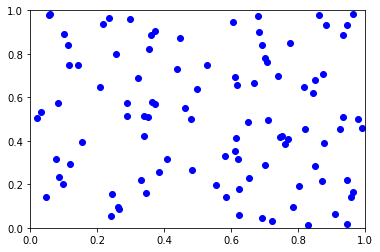

In [12]:
points = np.random.random((100, 2))
plt.scatter(points[:, 0], points[:, 1], c='b')
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.show()

We have plotted 100 points generated at random in the interval from 0 to 1 on both dimensions. Each of the points has a vector, which represents it in space. Let's print only the first two vectors of our matrix and look at their positions:

[[0.48049125 0.4998869 ]
 [0.11850082 0.29333044]]


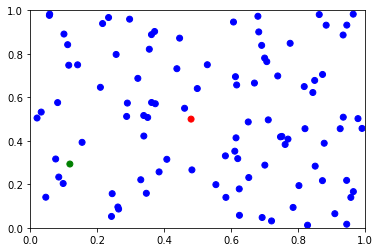

In [13]:
print(points[:2, :])
index_colors = ['r', 'g']
colors = [index_colors[i] if i < 2 else 'b' for i in range(points.shape[0])]
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.show()

Looking at the coordinates and the positions in the plane it is simple to see which one is which: we just look at the axes and try to fathom which of the two red points falls closer to our coordinates. 

An important concept when dealing with points is the distance between them. To tackle this, we have to choose a way to actually measure that distance, a metric. Usually we will work with the euclidean distance, which is just the distance of a straight line going from one point to the other. Computing this is simple, as it just means finding the length of the largest side in a triangle—the hypothenuse. Let's see what we mean with the two highlighted points:

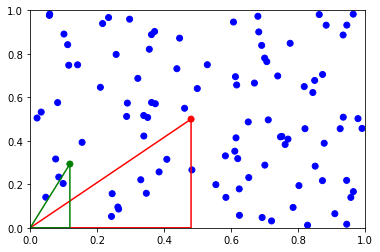

In [14]:
two_points = points[:2, :]
two_colors = colors[:2]
p1, p2 = two_points
first_triangle = np.asarray([[0, 0], p1, p1 * (1, 0), [0, 0]])
second_triangle = np.asarray([[0, 0], p2, p2 * (1, 0), [0, 0]])

# plot points again, this time with the triangles
plt.scatter(points[:, 0], points[:, 1], c=colors)
plt.plot(first_triangle[:, 0], first_triangle[:, 1], c='r')
plt.plot(second_triangle[:, 0], second_triangle[:, 1], c='g')
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.show()

Notice that we can find the distance from the origin at position $(0, 0)$ to each of the highlighted points by simply getting the length of the vector. This length of a vector is also called its **norm**. NumPy provides a function, `np.linalg.norm` to do exactly this. Let's see how the length of a vector is implemented so you get a sense of what we are doing and then just focus on the bigger picture:

In [15]:
def norm_example(v):
    accum = 0.0
    for c in v:
        accum += c * c
    return math.sqrt(accum)

np_norm = np.linalg.norm(p1)
example_norm = norm_example(p1)

print('The norm computed with NumPy is {} while it is {} with our function.'.format(np_norm, example_norm))

The norm computed with NumPy is 0.6933676891766387 while it is 0.6933676891766387 with our function.


Our aim here is to understand that the operations we are performing are really simple: the norm is nothing more than the square root of sum of each component, squared. This is called the L2-norm, as there can be other norms and ways of defining vector lengths. For us, however, this is all we need.

Let's take a step back. The norm function we have defined should look very similar to the dot product we defined before. In fact, it seems to be the square root of the dot product of a vector with itself. Scroll up and check. Then, let's see if that also produces the same result:

In [16]:
dot_norm = math.sqrt(p1.dot(p1))
print('The square root of the dot product of the point with itself is {}: equal to what we computed!'.format(dot_norm))

The square root of the dot product of the point with itself is 0.6933676891766387: equal to what we computed!


Our toolbox now contains 3 different ways of computing the norm of a vector. We would like to compute the distance between the red and green dot. Let's do another little drawing with triangles to see if we can gain some extra intuition:

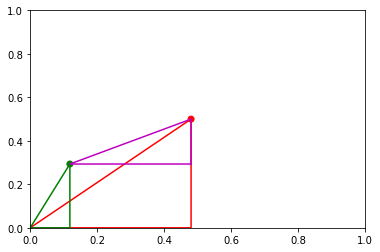

In [17]:
p_shift = [p1[0] if p1[1] > p2[1] else p2[0], p2[1] if p2[1] < p1[1] else p1[1]]
relative_triangle = np.asarray([p_shift, p1, p2, p_shift])

# plot the three triangles without the points in the back
plt.scatter(points[:2, 0], points[:2, 1], c=colors)
plt.plot(first_triangle[:, 0], first_triangle[:, 1], c='r')
plt.plot(second_triangle[:, 0], second_triangle[:, 1], c='g')
plt.plot(relative_triangle[:, 0], relative_triangle[:, 1], c='m')
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.show()

Now it should be pretty clear: we want the norm of the vector between the two points! Luckily for us, this is just a pointwise operation: we subtract the point at the end from the point at the beginning. After that, we get the vector between the two. Of course, when computing the distance it does not matter which one goes first: direction has no effect!

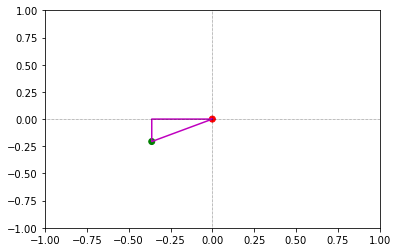

In [18]:
distance_vector = p2 - p1
plot_points = np.asarray([[0, 0], distance_vector, [distance_vector[0], 0], [0, 0]])

# plot the vector relative to the red point
plt.scatter(plot_points[:2, 0], plot_points[:2, 1], c=['r', 'g'])
plt.plot(plot_points[:, 0], plot_points[:, 1], c='m')
plt.axhline(0, color='k', linestyle='dotted', linewidth=0.5)
plt.axvline(0, color='k', linestyle='dotted', linewidth=0.5)
plt.gca().set_xlim(-1, 1)
plt.gca().set_ylim(-1, 1)
plt.show()

We now have the segment we want to compute the length of, represented as the vector going from the red point to the green one. The little magenta triangle represents that same path, but as if it sat in the center of the universe. The distance between $P_1$ and $P_2$ is the norm of the distance vector:

In [19]:
print('The distance between p1 and p2 is {}.'.format(np.linalg.norm(distance_vector)))

The distance between p1 and p2 is 0.41677648611285534.


At this point, we are almost done with our geometric primitives. We are just missing the concept of planes, which will let us linearly split space. This, in turn, will be the base for our introduction to neural networks. Let's begin by looking at points in a single dimension:

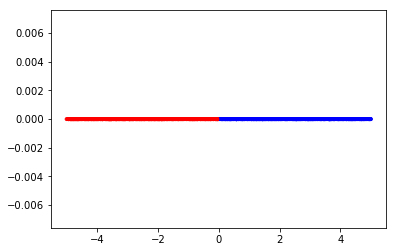

In [20]:
flats = np.random.random((1000)) * 10 - 5
flats_y = flats * 0 # y component is always 0 in this little plot
c = ['r' if p < 0 else 'b' for p in flats]
plt.scatter(flats, flats_y, marker='.', c=c)

In the plot, negative and positive points are colored differently. Our points go from -5 to 5, and we would like to arbitrarily set the boundary at any point in the number line, as well as arbitrarily chosing which side is red or blue. 

With some thinking, we can see that if we change the sign in the number line, we can get our color change. That is, we just multiply a number, which we call weight, by the point: 

In [21]:
def update_weight(s):
    '''Display a line of points and the effect of separating them using a weight variable.'''
    c_weight = ['r' if s * p < 0 else 'b' for p in flats]
    plt.scatter(flats, flats_y, marker='.', c=c_weight)
    plt.show()

interact(update_weight, 
         s=widgets.Select(options=[-2, -1, 0, 1, 2], value=1, description='Weight: '));

interactive(children=(Select(description='Weight: ', index=3, options=(-2, -1, 0, 1, 2), value=1), Output()), …

Positive weights keep blue in the positive and negative ones invert the colors so red is on the right and blue on the left. The actual numeric value of the weight doesn't matter, because our boundary only takes the sign into account.

Likewise, if we add some value to each of the numbers, we can shift them so that the colors are applied with some sort of shift:

In [22]:
def update_bias(b):
    '''Display a line of points and the effect of separating them using of a bias variable.'''
    c_bias = ['r' if p + b < 0 else 'b' for p in flats]
    plt.scatter(flats, flats_y, marker='.', c=c_bias)
    plt.show()

interact(update_bias, 
         b=widgets.FloatText(value=0.0, step=0.1, description='Bias: '));

interactive(children=(FloatText(value=0.0, description='Bias: ', step=0.1), Output()), _dom_classes=('widget-i…

Play around with the values in both interactive plots. We want to combine both ideas into one single decision, one single formula. The solution is to include both the weight and bias variables.

If you are quick with math, you might have noticed that this resembles representing our color as the sign of $f(x) = Ax + B$. The sign of $A$ will determine the direction of coloring the points, while $B$ will act as a shift that moves us around. If the sign of $f(x)$ is negative, we will assign red; otherwise blue. The following interactive plot should compliment these ideas:

In [23]:
def update_full(s, b):
    '''Display a line of points and the effect of separating them using both weight and bias variables.'''
    c_full = ['r' if s * p + b < 0 else 'b' for p in flats]
    plt.scatter(flats, flats_y, marker='.', c=c_full)
    plt.show()

interact(update_full, 
         s=widgets.FloatText(value=1.0, step=0.1, description='Weight: '),
         b=widgets.FloatText(value=0.0, step=0.1, description='Bias: '));

interactive(children=(FloatText(value=1.0, description='Weight: ', step=0.1), FloatText(value=0.0, description…

Now we have what we were looking for, but it's not enough. First of all, the real world is not one dimensional! 

In a more general case, we have an arbitrary number of components in an input vector $v$, $f(v) = w_1 v_1 + w_2 v_2 + ... + w_n v_n + b$. This operation, if you are keeping score at home, is just the dot product of $v$ with a weight vector $w$, to which we add $b$, a bias variable. Those names are funky but they will come to be part of our usual vocabulary. Don't get scared!

To get a better grasp of what we mean, we will interactively look at a two dimensional example of the same idea. Here, we have two components for our vector: one on the X axis and another one on the Y axis. Then, just like in the previous case, we have our little bias variable. Play around and you will notice how, with some effort, you can separate some of the points at will:

In [24]:
xx = np.linspace(-3.5, 3.5)
X = np.random.random((10000, 2)) * 7 - 3.5
def plot_hyperplane(x, y, c):
    '''Plot a plane with weights x and y and bias c.'''
    if y:
        a = -x / y
        yy = a * xx - c / y
        plt.plot(xx, yy, 'k-')
    else:
        s = np.linalg.norm([x, y])
        plt.vlines([-c / s], ymin=-3.5, ymax=3.5, colors='k')
    plt.show()

def plot_space(v, b):
    '''Plot the points taking into account the vector of weights v = (x, y) and the bias b.'''
    P = np.dot(X, v) + b 
    c = ['r' if p < 0 else 'b' for p in P]
    plt.scatter(X[:, 0], X[:, 1], marker='.', c=c)
    
def update_2d(u, w, b):
    '''Display the effect of the weight vector (x, y) and the bias variable.'''
    v = [u, w]
    plot_space(v, b)
    plt.gca().set_xlim(-3.5, 3.5)
    plt.gca().set_ylim(-3.5, 3.5)
    plot_hyperplane(u, w, b)
    print('The hyperplane is formed by the direction vector {}, with length {}, and a bias variable of {}.'.format(v, np.linalg.norm(v), b))

    
interact(update_2d, 
         u=widgets.FloatText(value=1.0, step=0.1, description='X comp: '),
         w=widgets.FloatText(value=0.0, step=0.1, description='Y comp: '),
         b=widgets.FloatText(value=0.0, step=0.1, description='Bias: '));

interactive(children=(FloatText(value=1.0, description='X comp: ', step=0.1), FloatText(value=0.0, description…

A good exercise is to try to separate some part of our space. For instance, play around until you find a plane that colors everything but the top left in red. That is, values that match a plot similar to:

![Sample problem](images/TargetPlane.png)

When you find the correct values, put them in the next cell to validate them. If they are correct, you will get a `Correct!` message!

In [ ]:
started = False
def validate(u, w, b):
    '''Validate a given plane setup for classifying the points as shown in the image.'''
    if not started:
        print('Find the correct values to replicate the plot above in the interactive plot!')
        return
    
    # validation plane
    a = 3 * np.pi / 4
    b_or = -3.1819805153
    v_or = [np.cos(a), np.sin(a)]
    P_or = np.dot(X, v_or) + b_or
    
    # user-input plane
    v_in = [u, w]
    P_in = np.dot(X, v_in) + b
    
    # verification tuples
    ver = zip(*[[p < 0 for p in P] for P in [P_or, P_in]])
    total = float(sum(a == b for (a, b) in ver))
    
    # if 95% of the points are correctly classified it's fine enough!
    total_correct = total / len(P_or)
    if total_correct > 0.95:
        print('Correct! The plane defined by {} and {} is similar to the one above (with {}% accuracy)!'.format(v_in, b, total_correct * 100))
        update_2d(u, w, b)
    else:
        print('Nope! Your results are too different from the above plot, try narrowing it down!')

interact(validate, 
         u=widgets.FloatText(value=1.0, step=0.1, description='X comp: '),
         w=widgets.FloatText(value=0.0, step=0.1, description='Y comp: '),
         b=widgets.FloatText(value=0.0, step=0.1, description='Bias: '));
started = True

Hopefully, this has given you an understanding of what a plane is: nothing but a direction shifted by some bias! With it, we have seen we can partition parts of space. Furthermore, the way we compute whether or not a point is in front of them is by performing the dot product of the direction vector and then adding up the bias. If the result is positive, we are in front; we are in the back if it is negative and in the middle of the plane if it is exactly 0.

To recap all that we have seen so far, let's remind ourselves of the two sections and their contents:
1. On Algebra 101 we covered:
    1. NumPy arrays: vectors, matrices and tensors
    2. Scalar operations on those arrays
    3. Point-wise operations between tensors
    4. The infamous dot product!
2. For our Geometric Primitives, we discussed:
    1. Points in space
    2. Vectors between points, their meaning and their length
    3. Distances between points
    4. Planes, in both 1 and 2 dimensions, and the boundaries they create!

In the next class, we will finally start with neural networks. However, let's get a little taste. Consider planes as we have seen so far: can you think of a way to separate the red and blue areas shown in the next plot with them?

![Mental exercise: separate a parabola](images/TargetSeparate.png)